In [ ]:
"""
Analysis of U.S. Suicide Rates

Jaime Lu and Rohit Varadhan

Intro + Context here (I have it on a doc)

"""

In [2]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# After downloading the data and storing it in the same folder as your Jupyter file, we will read in the data.
data = pd.read_csv("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")

# We are going to clean up some unneccessary columns for better visualization of what the data looks like
data.drop(data[(data['UNIT_NUM'] == 0) | (data['UNIT_NUM'] == 1) | (data['YEAR'] < 1950)].index, inplace=True)

del data['INDICATOR']
del data['FLAG']
del data['UNIT']
del data['STUB_NAME_NUM']
del data['YEAR_NUM']
del data['UNIT_NUM']

data.head(19)

,STUB_NAME,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,AGE_NUM,ESTIMATE
698,Total,All persons,0.0,1980,All ages,0.0,11.9
728,Total,All persons,0.0,1981,All ages,0.0,12.0
814,Total,All persons,0.0,1950,All ages,0.0,11.4
815,Total,All persons,0.0,1960,All ages,0.0,10.6
816,Total,All persons,0.0,1970,All ages,0.0,11.6
817,Total,All persons,0.0,1982,All ages,0.0,12.2
818,Total,All persons,0.0,1983,All ages,0.0,12.1
819,Total,All persons,0.0,1984,All ages,0.0,12.4
820,Total,All persons,0.0,1985,All ages,0.0,12.4
821,Total,All persons,0.0,1986,All ages,0.0,12.9


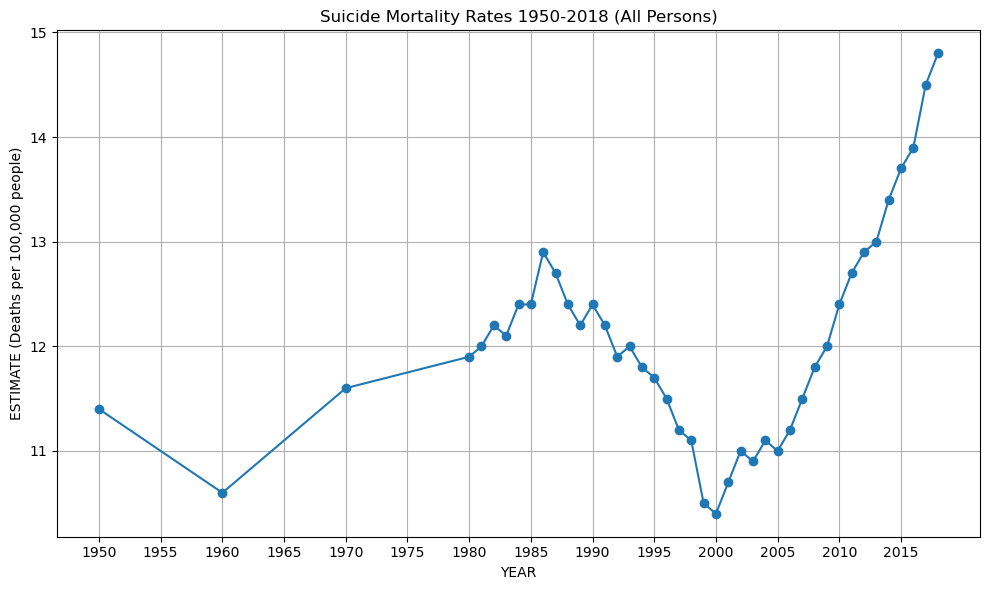

In [6]:
# Our first data visualization: Estimate vs Year for the 'All Persons' demographic category so we can get a general sense of the suicide rates
all_persons_data = data[data['STUB_LABEL'] == 'All persons'].copy()

all_persons_data.sort_values(by='YEAR', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(all_persons_data['YEAR'], all_persons_data['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1950-2018 (All Persons)')

plt.xticks(range(min(all_persons_data['YEAR']),max(all_persons_data['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

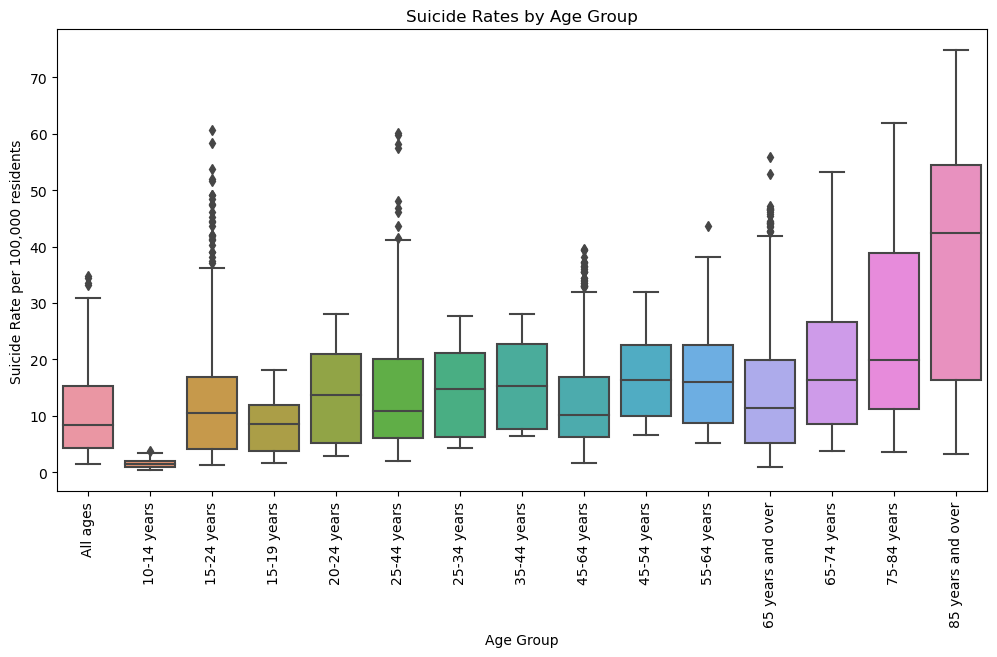

In [8]:
#Hmm, looks interesting enough, but this alone does not give us much to work with.
#Maybe mention missing data from 1950 to 1980 if we choose to go down this route
#Let's now visualize suicide rates (Estimate) by age group with a box plot.

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='AGE', y='ESTIMATE')
plt.title('Suicide Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate per 100,000 residents')
plt.xticks(rotation=90)
plt.show()


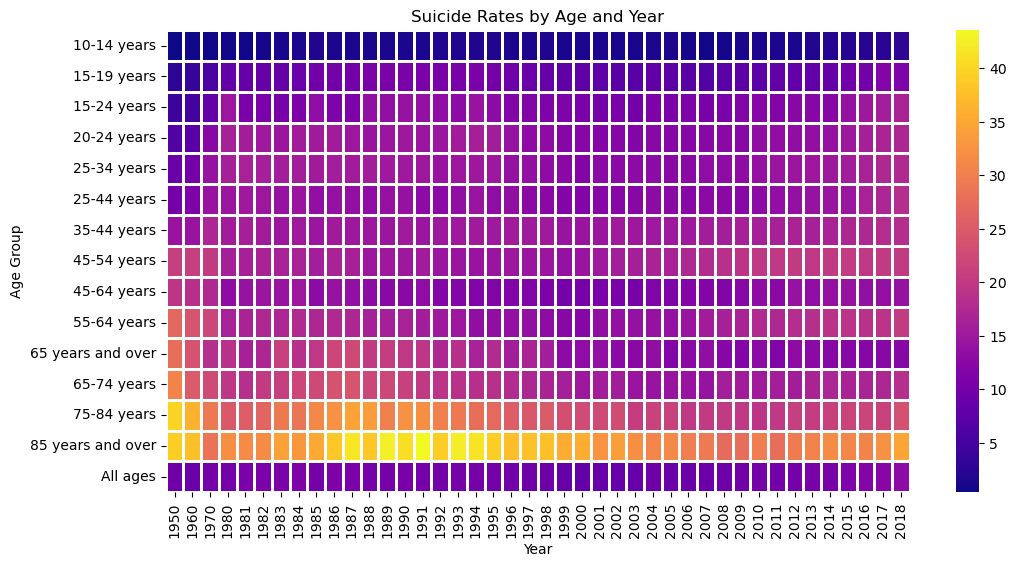

In [13]:
# Looking at age groups we can start to notice that age could be a strong factor for suicide rate.
# Let's combine age and year using a heatmap to look at 2 attributes of the Suicide Rates from 1950 to 2018.

pivot_table = data.pivot_table(values='ESTIMATE', index='AGE', columns='YEAR', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='plasma', linecolor='white', linewidths=1)
plt.title('Suicide Rates by Age and Year')
plt.xlabel('Year')
plt.ylabel('Age Group')
plt.show()

In [ ]:
#Now we can visually see the age groups' suicide rate with the year to help see if it's an ongoing pattern. 